### Different Algorithems for Binary Classification Task

In this notebook we will use different algorithems to solve binary classification task. The methods we will be using are:

- Logistic Regression
- Neural Network
- Random Forest
- SVM
- KNN

#### No Free Lunch Theorem
In 1996 David Wolpert demonstrated that if you make absolutely no assumption about the data, then there is no reason to prefer one model over any other. This is called the No Free Lunch (NFL) theorem. For some datasets the best model is a linear model, while for other datasets it is a neural network. There is **no** model that is a priori guaranteed to work better (hence the name of the theorem). The only way to know for sure which model is best is to evaluate them all. Since this is not possible, in practice you make some reasonable assumptions about the data and you evaluate only a few reasonable models. For example, for simple tasks you may evaluate linear models with various levels of regularization, and for a complex problem you
may evaluate various neural networks.

#### Support Vector Machine (SVM)
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.  

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane.

<img src="https://miro.medium.com/max/700/0*ecA4Ls8kBYSM5nza.jpg" width="400"/>

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM. In SVM, we take the output of the linear function and if that output is greater than 1, we identify it with one class and if the output is -1, we identify is with another class. Since the threshold values are changed to 1 and -1 in SVM, we obtain this reinforcement range of values([-1,1]) which acts as margin.

#### Dataset information
The dataset we will use is load_data.
We will make two interleaving half circles, and so two classes and 100 observations. We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). 
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: 0 is fully paid back 1 vice versa.
-----

The libraries we will be using are:
* [matplotlib](https://matplotlib.org/)
* [pandas](https://pandas.pydata.org/)
* [numpy](https://numpy.org/)
* [seaborn](https://seaborn.pydata.org/)
* [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data and see what does it look like

In [2]:
df = pd.read_csv('loan_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Exploratory Data Analysis

Text(0.5, 0, 'FICO')

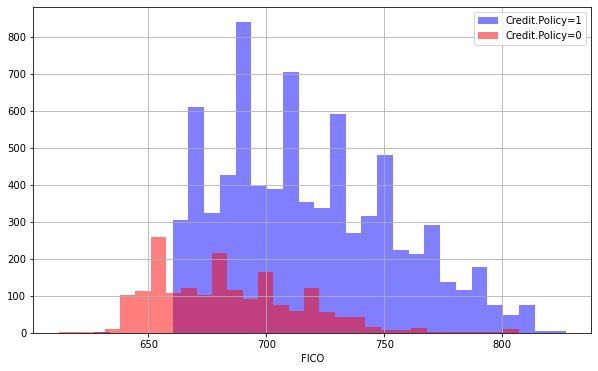

In [5]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

The customers who meet the credit underwriting criteria have overall higher FICO scores

<AxesSubplot:xlabel='purpose', ylabel='count'>

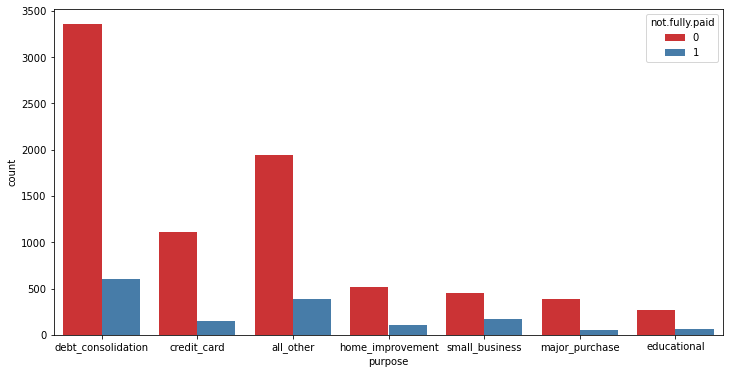

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

We found that no matter in which group, debt_consolidation is the most frequent purpose that people borrowing money.  

See if the trend is different between not.fully.paid and credit.policy.

<Figure size 648x360 with 0 Axes>

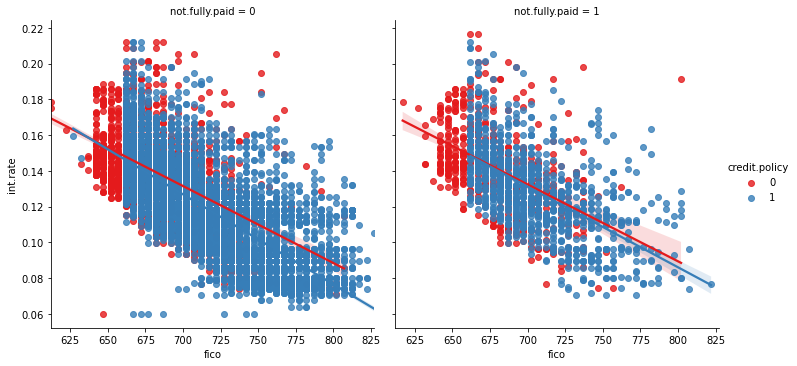

In [7]:
plt.figure(figsize=(9,5))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

Setting up the data 
Make purpose into dummy variable

In [8]:
cat_feats = ['purpose']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [9]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


##### Data Processing

Use [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn to scale the features.

In [17]:
from sklearn.preprocessing import MinMaxScaler
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features,columns=X.columns[:])

Split the data into training and testing

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Training on different models
------------------

##### Logistic Regression, Neural Network, Random Forest, Support Vector Machines,  KNN, and ensemble.

We first fit the data to the different models and compare the differences. We will use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), and [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) from sklearn. 

Evaluate the accuracy by using [accuracy_score](https://scikit-learn.org/stable/modules/model_evaluation.html), [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall%20score#sklearn.metrics.recall_score) and [precision score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html?highlight=precision%20score#sklearn.metrics.precision_score) from sklearn.  

The recall is the ratio tp / (tp + fn)
The precision is the ratio tp / (tp + fp)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC



from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression(max_iter=1000)
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,5,3), activation='logistic',solver='adam',max_iter=1000)
rand_clf = RandomForestClassifier()
svm_clf =SVC()
knn_clf = KNeighborsClassifier(n_neighbors=4)


voting_clf = VotingClassifier([('lr', log_clf),
                               ('mlp',mlp_clf),
                               ('rf', rand_clf),
                               ('svm', svm_clf),
                               ('knn', knn_clf)
                               ], voting = 'hard')

for clf in [log_clf,mlp_clf,rand_clf,svm_clf, knn_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')
    print(f'{clf.__class__.__name__}, precision score = {precision_score(y_test, y_pred)}')

LogisticRegression, accuracy score = 0.8389004871259569
LogisticRegression, precision score = 0.5652173913043478
MLPClassifier, accuracy score = 0.83785664578984
MLPClassifier, precision score = 0.0


C:\Users\c\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier, accuracy score = 0.8354210160055672
RandomForestClassifier, precision score = 0.37037037037037035
SVC, accuracy score = 0.83785664578984
SVC, precision score = 0.0


C:\Users\c\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier, accuracy score = 0.8336812804453723
KNeighborsClassifier, precision score = 0.39655172413793105
VotingClassifier, accuracy score = 0.8395963813500348
VotingClassifier, precision score = 1.0


#### Conclusion
We see that most all of the accuracy from different methods are really close, and ensemble method has the slightly highest accuracy among all other methods. We also see that MLPClassifier has slightly lower score than LogisticRegression, so we know that a complex model does not necessarily outperform the simpler model. And even though all of the models have really close accuracy, we may want to take a look of their precision and recall and decide which one we care more about. Here, we may care abuut false negative more (people who don't pay back but be classified as payback), so we may want to see their precision score (1-precision = false negative). The higher the precision, the lower the false negative rate. After comparing the precision score, we may want to use ensemble method since its precision score is the highest, and we can see MLP and SVM have a very low precision score (0). Most of the methods have low precision score, but the ensemble method has a high precision score. We may also adjust the parameters of algorithems to adjust their false negative and positive rates.

#### Reference
Gandhi, Rohith. “Support Vector Machine - Introduction to Machine Learning Algorithms.” Medium, Towards Data Science, 5 July 2018, https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47. 